In [1]:
import gudhi
print(gudhi.__version__)


3.11.0


In [33]:
!pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 4.5 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 5.0 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 6.0 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 5.7 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.1 MB 6.3 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 6.3 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.1 MB 6.3 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 5.9 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


In [2]:
import gudhi
import numpy as np

# Testando o cálculo de distância de um simples Diagrama de Persistência
dgm1 = np.array([(0.1, 0.5), (0.2, 0.6)])
dgm2 = np.array([(0.15, 0.55), (0.25, 0.65)])

try:
    dist = gudhi.bottleneck_distance(dgm1, dgm2)
    print("Distância Bottleneck:", dist)
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Distância Bottleneck: 0.050000000000000044


In [3]:
import gudhi 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def SampleOnCircle(N = 100, sd = 0):
    '''
    Sample N_observation points from the uniform distribution on the unit circle 
    in R^2, with Gaussian noise of standard deviation sd.
        
    Input: 
        N (int): number of sample points on the circle.
        N_noise (float, optional): standard deviation of the Gaussian noise
    
    Output : 
        data (np.array): size Nx2, the points concatenated.
    '''
    rand_uniform = np.random.rand(N)*2-1    
    X = np.cos(2*np.pi*rand_uniform)
    Y = np.sin(2*np.pi*rand_uniform)
    data = np.stack((X,Y)).transpose() + np.random.normal(0, sd,  (N, 2))
    return data

def PlotThickening(X,t):
    '''
    Plot a matplotlib figure representing the t-thickening of the point cloud X. 
    X must be a point cloud in the plane.
    
    Input: 
        X (np.array): size Nx2, the points concatenated.
        
    Example:
        X = np.asarray([[0,1],[1,0],[-1,1]])
        PlotThickening(X, 0.2)
    '''
    if np.shape(X)[1]!=2:
        print('Error! X is not in R^2')
        return False 
    N=np.shape(X)[0]
    fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot()
    for i in range(N):
        circle = plt.Circle((X[i,0], X[i,1]), t, color='magenta', alpha = 0.3)
        ax.add_artist(circle)
    for i in range(N):
        point = plt.Circle((X[i,0], X[i,1]), 0.02, facecolor='black', edgecolor = 'black', alpha = 1)
        ax.add_artist(point)
    bound = np.max(np.abs(X))+t    
    plt.xlim(-bound, bound); plt.ylim(-bound, bound)
    plt.axis('off')
    plt.show()

#### Building a filtration

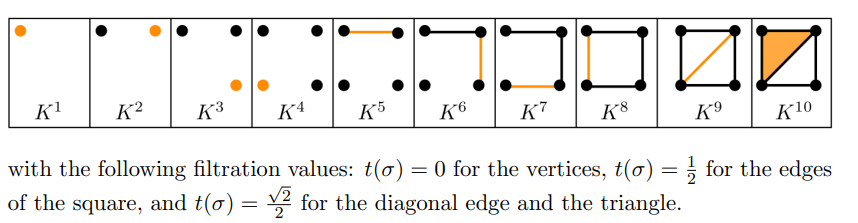

#### Cálculo das filtrações

In [5]:
st = gudhi.SimplexTree()

for i in range(4):
    st.insert([i])
    
# insert edges
st.insert([0,1], 1/2) # we give the filtration value 1/2
st.insert([1,2], 1/2)
st.insert([2,3], 1/2)
st.insert([3,0], 1/2)

#insert diagonal and triangle
st.insert([1,3], np.sqrt(2)/2)
st.insert([0,1,3], np.sqrt(2)/2)

True

Daí, calculamos o *barcode* da filtração

In [6]:
st.compute_persistence(homology_coeff_field = 2)
print(st.betti_numbers())

[1, 1]


Cada elemento $(d,(a, b))$ corresponde ao intervalo $(a, b)$ no d-ésimo grupo de homologia $H_d$

In [7]:
barcode = st.persistence(homology_coeff_field = 2)
print(barcode)

[(1, (0.5, inf)), (0, (0.0, inf)), (0, (0.0, 0.5)), (0, (0.0, 0.5)), (0, (0.0, 0.5))]


#### Plot dos *barcodes*

C:\Users\jmlnn\AppData\Local\Programs\Python\Python311\Lib\site-packages\gudhi\persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

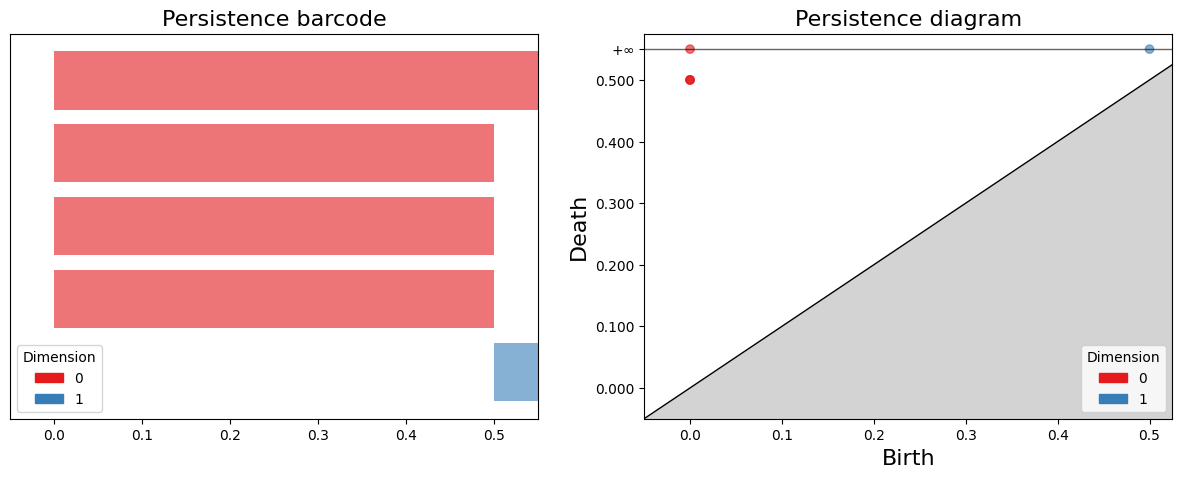

In [8]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)

gudhi.plot_persistence_barcode(barcode, axes = ax1)
gudhi.plot_persistence_diagram(barcode, axes = ax2)

### Rips complex on circle with outliers

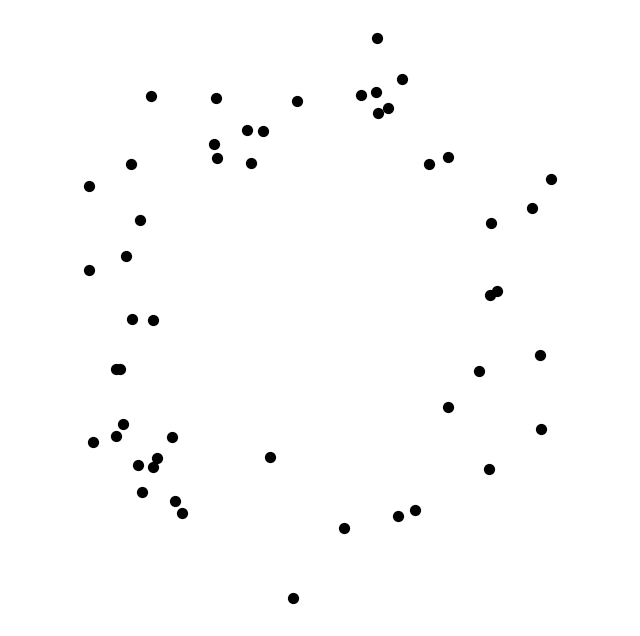

In [9]:
# Criação de uma amostra ruídosa do círculo
N = 50
sd = 0.15

X = SampleOnCircle(N, sd)

# plotting the point cloud
fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:,0],X[:,1], c='black', s=50)
plt.axis('equal'); plt.axis('off'); plt.show()

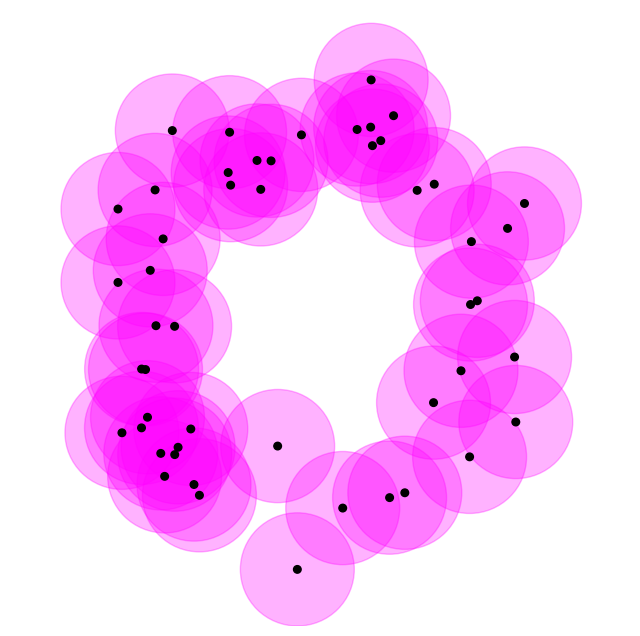

In [10]:
PlotThickening(X,t=0.3)

Criamos sua filtração de Rips, especificando seu maior comprimento de aresta e sua dimensão máxima de simplíces.
Para calcular a homologia da dimensão $d$ precisamente, é necessário inserir as símplices de dimensão $d+1$.

In [11]:
rips = gudhi.RipsComplex(points = X/2, max_edge_length = 1)
st = rips.create_simplex_tree(max_dimension=2) # Adicionando símplices até dimensão 2

Então, podemos calcular os *barcodes*

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

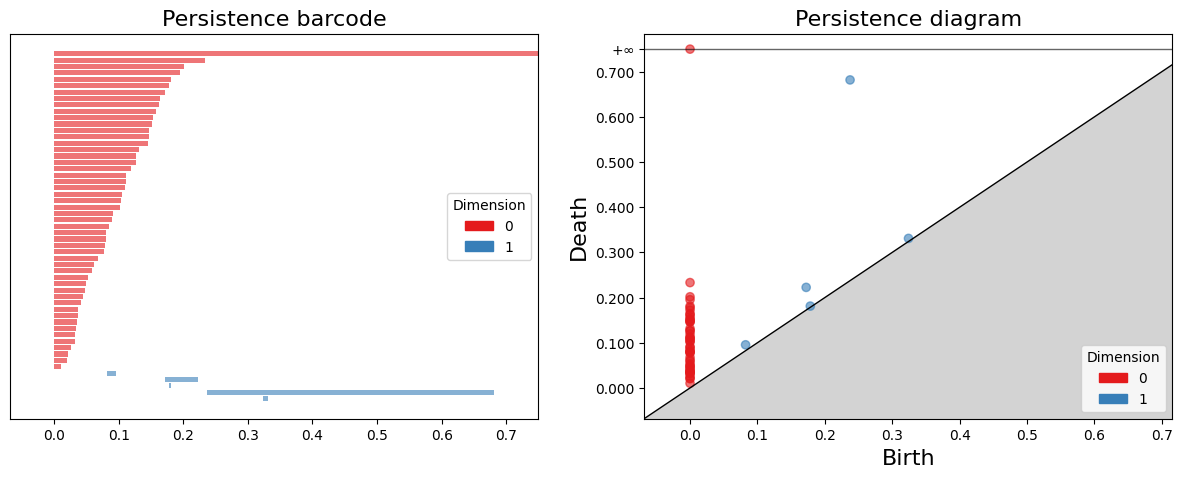

In [12]:
barcodes = st.persistence(homology_coeff_field = 2) # homologu_coeff_field deve ser primo
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)

gudhi.plot_persistence_barcode(barcodes, axes = ax1)
gudhi.plot_persistence_diagram(barcodes, axes = ax2)

#### Verificar o teorema da estabilidade.
Para isso, criemos dois conjuntos de dados em $\mathbb{R}^2$

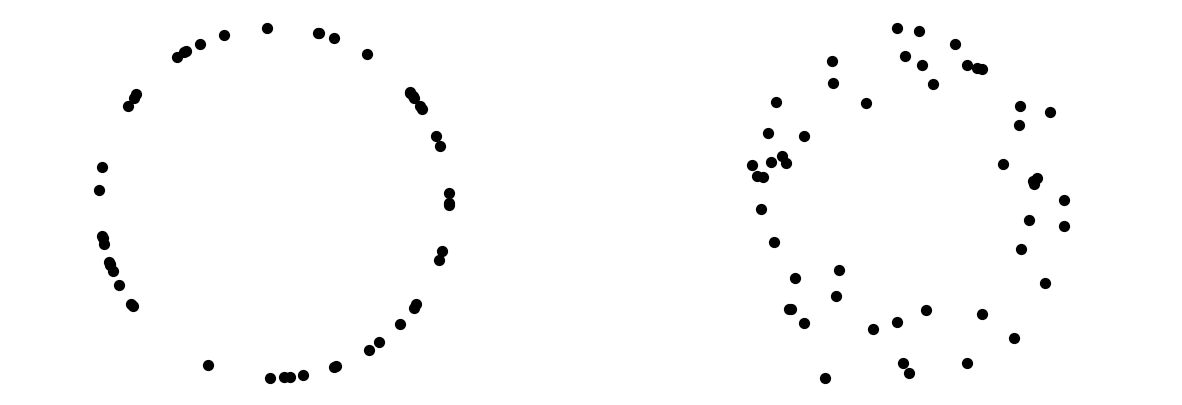

In [13]:
X = SampleOnCircle(N=50, sd=0)
Y = SampleOnCircle(N=50, sd=0.15)

# plots
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
ax1.scatter(X[:,0],X[:,1], c='black', s=50); ax1.axis('equal'); ax1.axis('off');
ax2.scatter(Y[:,0],Y[:,1], c='black', s=50); ax2.axis('equal'); ax2.axis('off');

#### Barcodes das filtrações de Rips

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

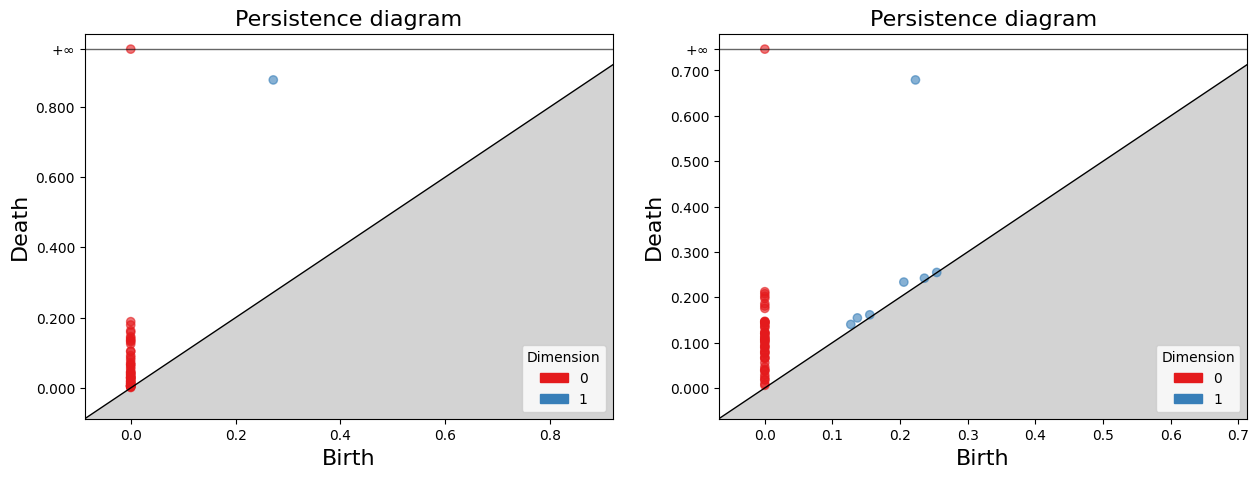

In [19]:

stX = gudhi.RipsComplex(points = X/2, max_edge_length = 2).create_simplex_tree(max_dimension=2)
barcodeX = stX.persistence(homology_coeff_field = 2)

stY = gudhi.RipsComplex(points = Y/2, max_edge_length = 2).create_simplex_tree(max_dimension=2)
barcodeY = stY.persistence(homology_coeff_field = 2)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
gudhi.plot_persistence_diagram(barcodeX, axes = ax1)
gudhi.plot_persistence_diagram(barcodeY, axes = ax2)

In [15]:
RipsY = gudhi.RipsComplex(points = X/2, max_edge_length = 2)
stY = RipsY.create_simplex_tree(max_dimension=2) # simplextree da filtração de Rips
barcodeY = stY.persistence(homology_coeff_field = 2)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

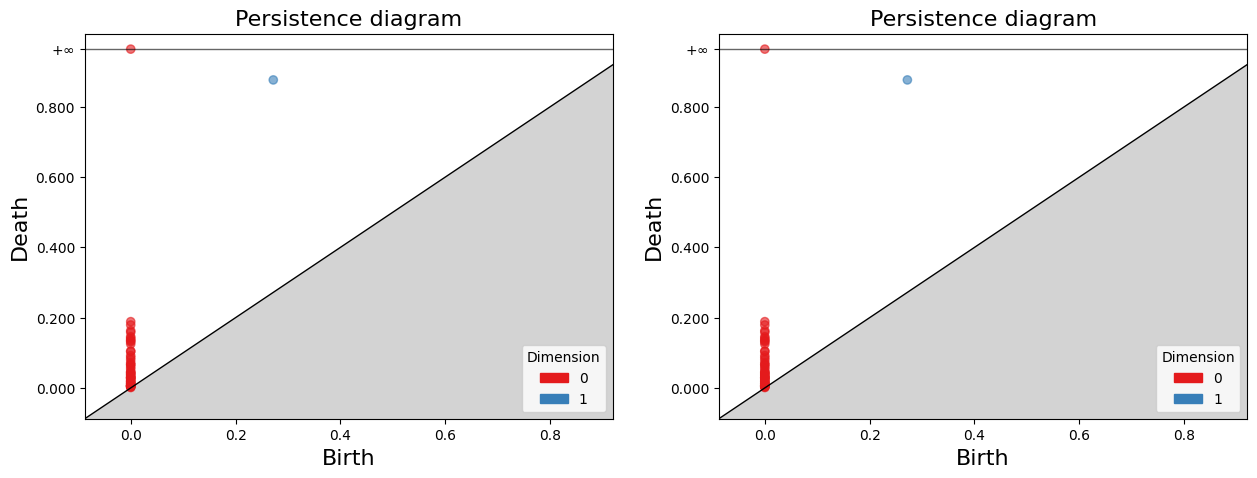

In [16]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
gudhi.plot_persistence_diagram(barcodeX, axes = ax1)
gudhi.plot_persistence_diagram(barcodeY, axes = ax2)

#### Cálculos das distâncias

In [20]:
barcodeX_0 = stX.persistence_intervals_in_dimension(0)
barcodeY_0 = stY.persistence_intervals_in_dimension(0)
bottleneck_distance_0 = gudhi.bottleneck_distance(barcodeX_0, barcodeY_0)
print('Bottleneck distance between H_0: '+repr(bottleneck_distance_0))

Bottleneck distance between H_0: 0.05966141186810328


In [21]:
barcodeX_1 = stX.persistence_intervals_in_dimension(1)
barcodeY_1 = stY.persistence_intervals_in_dimension(1)
bottleneck_distance_1 = gudhi.bottleneck_distance(barcodeX_1, barcodeY_1)
print('Bottleneck distance between H_1: '+repr(bottleneck_distance_1))

Bottleneck distance between H_1: 0.19736967732246868


In [22]:
from scipy.spatial.distance import directed_hausdorff
Hausdorff_distance = max(directed_hausdorff(X, Y)[0], directed_hausdorff(Y, X)[0])
print('Hausdorff distance: '+repr(Hausdorff_distance))

Hausdorff distance: 0.43175850282808637


### Exercise 54
The cyclo-octane molecules dataset has been presented in Section 8. The
authors simulated many molecules, resulting in a point cloud in $\mathbb{R}^{72}$. However, the
dataset given in the notebook only contains the positions of the carbon atoms, hence we
have a point cloud in $\mathbb{R}^{24}$.
Compute the barcodes of the Rips filtration of this dataset, up to dimension 3, and
with a maximal edge length of 0.3.

In [ ]:
""Não consegui rodar"""

In [ ]:
file = r"C:\Users\jmlnn\OneDrive\Engenharia\1. Matemática\Topological Data Analysis\Cy8.txt"
readfile = open(file).read()
X = np.asarray([[float(a) for a in item.split()] for item in readfile.split('\n')[:-1]])

In [ ]:
# Compute its Rips complex
Rips = gudhi.RipsComplex(points = X/2, max_edge_length = 2)
st = Rips.create_simplex_tree(max_dimension=2) # simplextree da filtração de Rips



### Exercise 55

In [ ]:
# O algortimo de Time Delay Embedding serve para mapear uma série temporal em um conjunto de pontos numa dimensão R^n 

In [23]:
def TimeDelayEmbedding(x,edim,delay=1):
    """time delay embedding of a d-dim times series into R^{d*edim}
    the time series is assumed to be periodic
    parameters:
        + x: a list of d lists of same length L or a dxL numpy array
        + edim: the number of points taken to build the embedding in R^{d*edim}
        + delay: embeeding given by (x[i],x[i+delay],...,x[i + (edim-1)*delay])
            Default value for delay is 1
    """
    ts = np.asarray(x)
    if len(np.shape(ts)) == 1:
        ts = np.reshape(ts,(1,ts.shape[0]))
    ts_d = ts.shape[0]
    ts_length = ts.shape[1]
    output = ts
    for i in range(edim-1):
        output = np.concatenate((output,np.roll(ts,-(i+1)*delay,axis=1)),axis=0)
    return output

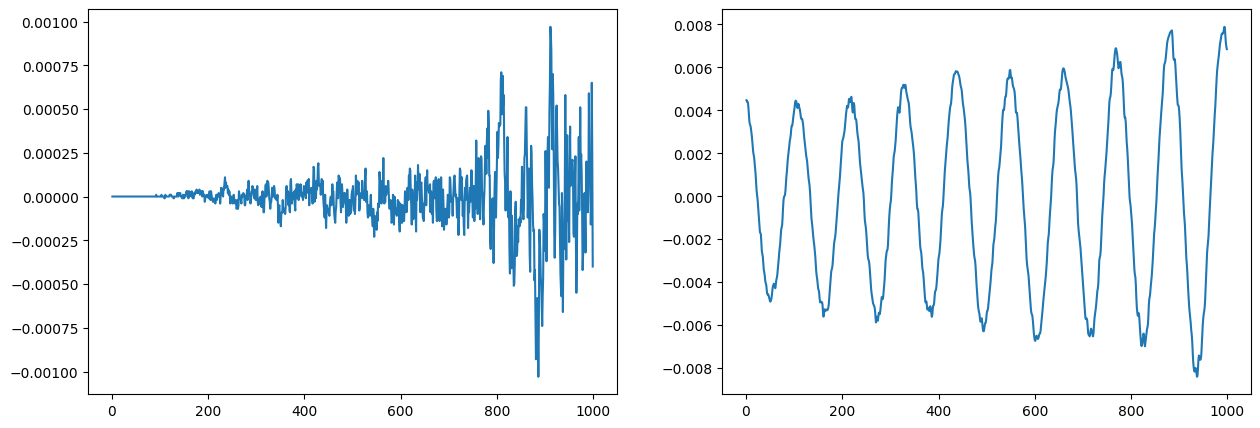

In [40]:
flute = np.genfromtxt(r"C:\Users\jmlnn\OneDrive\Engenharia\1. Matemática\Topological Data Analysis\Flute A full time series.csv", delimiter=',')
clarinet = np.genfromtxt(r"C:\Users\jmlnn\OneDrive\Engenharia\1. Matemática\Topological Data Analysis\Clarinet A full time series.csv", delimiter=',')# plot beginning of datasets

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
# Plotamos as primeiras 1000 amostras
ax1.plot(range(1000), flute[0:1000])
ax2.plot(range(1000), clarinet[0:1000])

In [41]:
len_sample = 500
i = np.random.randint(0,len(flute)-len_sample) 
sample = flute[i:i+len_sample]

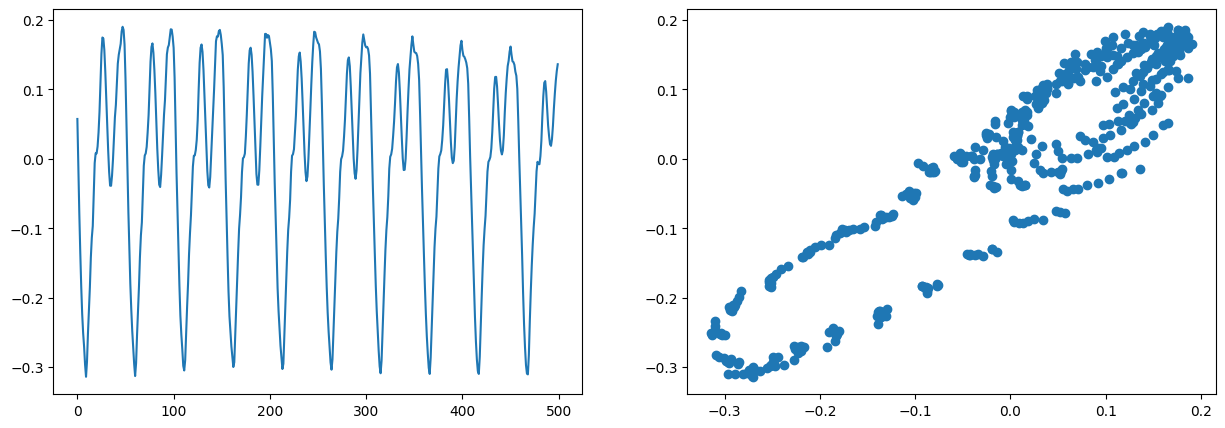

In [42]:
# time delay embedding of flute

len_sample = 500
i = np.random.randint(0,len(flute)-len_sample) # sorteia um número inteiro entre 0 e 38500
sample = flute[i:i+len_sample] # extrai uma sequência qualquer de 500 amostras

# Visualização da série temporal
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
ax1.plot(range(len(sample)), sample)

tde = TimeDelayEmbedding(sample, edim=2, delay=2) # mapeamento da série temporal para o R^2
plt.scatter(tde[0,:],tde[1,:]) # plot

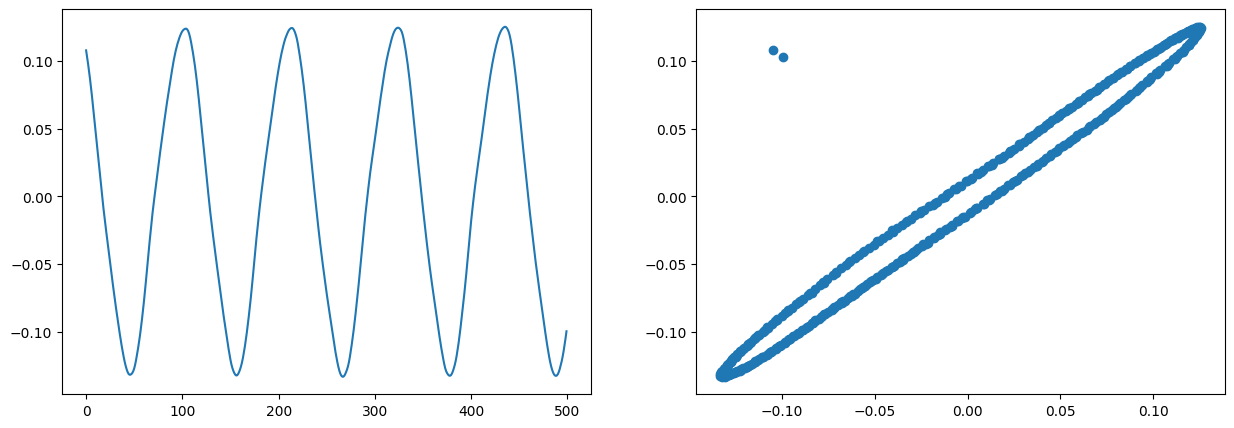

In [43]:
# time delay embedding of clarinet

len_sample = 500
i = np.random.randint(0,len(clarinet)-len_sample)
sample = clarinet[i:i+len_sample]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
ax1.plot(range(len(sample)), sample)

tde = TimeDelayEmbedding(sample, edim=2, delay=2) 
plt.scatter(tde[0,:],tde[1,:])

- Compute the $H1$-barcodes of their Rips filtration

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

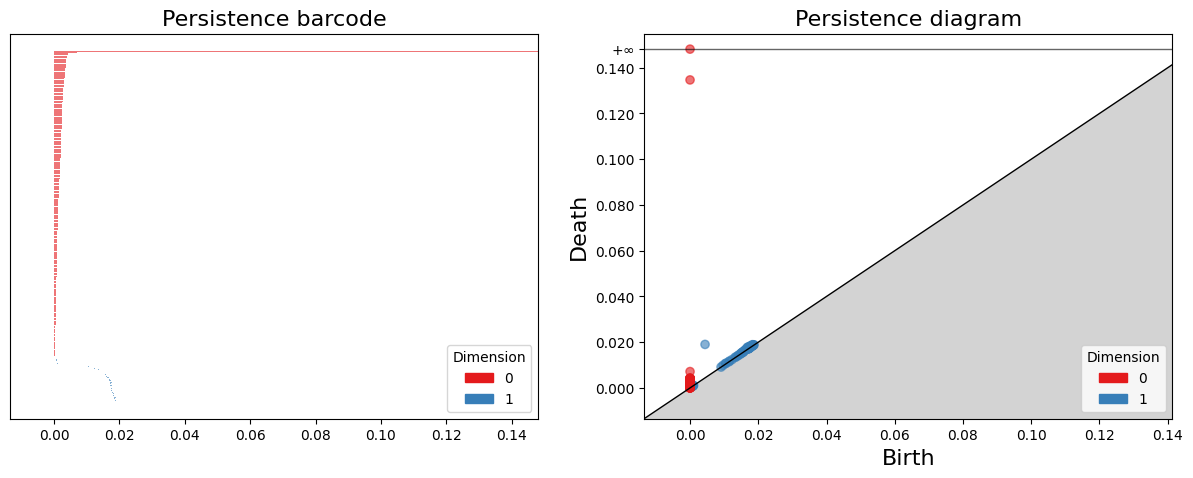

In [44]:
rips = gudhi.RipsComplex(points = tde.T, max_edge_length = 0.2)
st = rips.create_simplex_tree(max_dimension=2)

barcode = st.persistence(homology_coeff_field = 2)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)

gudhi.plot_persistence_barcode(barcode, axes = ax1)
gudhi.plot_persistence_diagram(barcode, axes = ax2)

Então, podemos concluir do diagrama que temos duas componentes conexas $H_0$ e por um curto instante, um buraco de dimensão $H1$

- computing the number of cycles with persistence greater than 0.03 (call them the *cycles with large persistence*) and the mean number of *cycles with large persistence* over all the samples (of a given instrument)

In [45]:
# Mean number of cycles for flute

Betti_flute = []

N = 10
for a in range(N):
    len_sample = 500
    i = np.random.randint(0,len(flute)-len_sample)
    sample = flute[i:i+len_sample]

    delay = 2
    tde = TimeDelayEmbedding(sample, edim=2, delay=delay)    

    st = gudhi.RipsComplex(points = tde.T, max_edge_length = 0.2).create_simplex_tree(max_dimension=2)
    barcode = st.persistence(homology_coeff_field = 2) 
    pers = np.array([I[1]-I[0] for I in st.persistence_intervals_in_dimension(1)])
    Betti_flute.append(sum(pers>0.03))

Betti_flute_mean = np.mean(Betti_flute)

print(f'Betti_flute_mean = {Betti_flute_mean}')
print(f'Betti_flute = {Betti_flute}')

Betti_flute_mean = 1.7
Betti_flute = [2, 2, 2, 2, 2, 2, 2, 1, 2, 0]


In [46]:
# Mean number of cycles for clarinet

Betti_clarinet = []

N = 10
for a in range(N):
    len_sample = 500
    i = np.random.randint(0,len(flute)-len_sample)
    sample = flute[i:i+len_sample]

    delay = 1
    tde = TimeDelayEmbedding(sample, edim=2, delay=delay)    

    st = gudhi.RipsComplex(points = tde.T, max_edge_length = 0.2).create_simplex_tree(max_dimension=2)
    barcode = st.persistence(homology_coeff_field = 2)
    pers = np.array([I[1]-I[0] for I in st.persistence_intervals_in_dimension(1)])
    Betti_clarinet.append(sum(pers>0.03))

Betti_clarinet_mean = np.mean(Betti_clarinet)

print('Betti_clarinet_mean = '+repr(Betti_clarinet_mean))
print('Betti_clarinet = '+repr(Betti_clarinet))

Betti_clarinet_mean = 1.4
Betti_clarinet = [3, 2, 1, 0, 0, 3, 3, 1, 1, 0]


### Exercise 56

In [24]:
# import dataset

import pickle

import pickle

file_path = r"C:\Users\jmlnn\OneDrive\Engenharia\1. Matemática\Topological Data Analysis\acc.txt"

# Abrindo o arquivo em modo binário
with open(file_path, "rb") as file:
    data = pickle.load(file, encoding="latin1")

data_A = data[0]
data_B = data[1]
data_C = data[2]

In [25]:
data_A[0].shape

(200, 3)

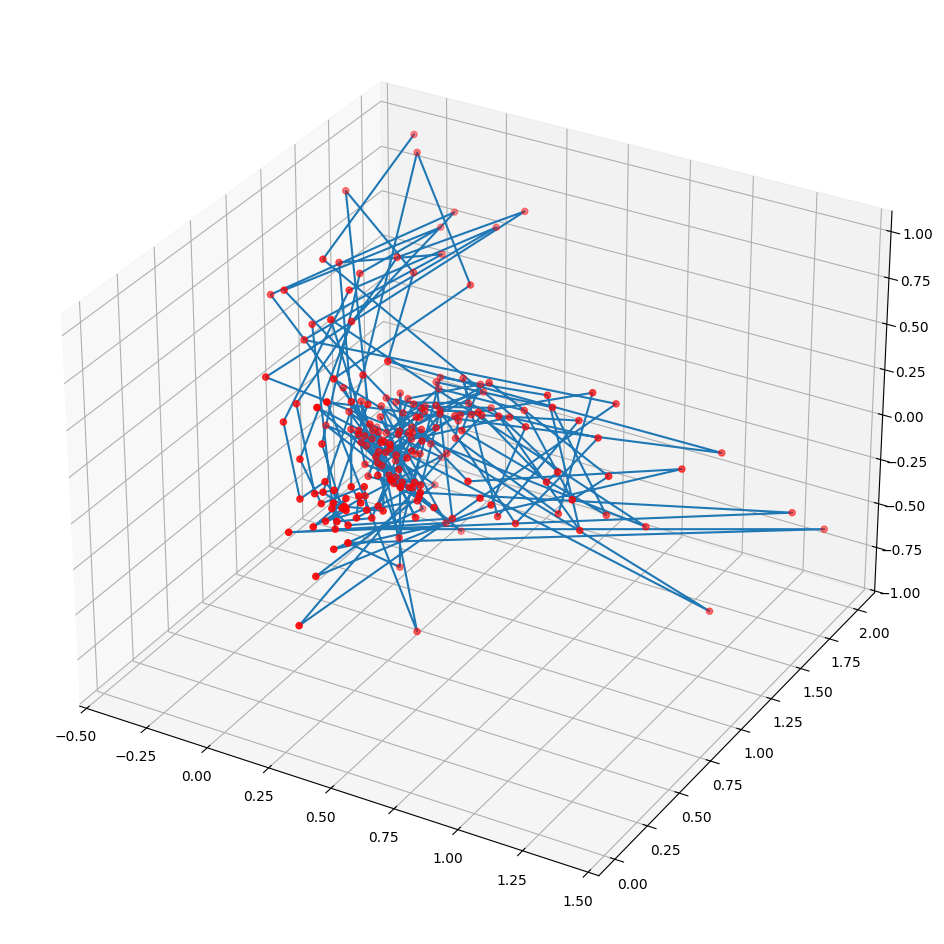

In [26]:
# Tomamos uma amostra pseudo-aleatória de data_A
i = np.random.randint(0, len(data_A))
data_A_sample = data_A[i]

# Plotamos a sua série temporal
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_A_sample [:,0],data_A_sample [:,1],data_A_sample [:,2], c='red')
ax.plot(data_A_sample [:,0],data_A_sample [:,1],data_A_sample [:,2])

Cada série temporal representa as 3 coordenadas da aceleração da pessoa correspondente num sistema de coordenadas atrelada ao sensor.

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

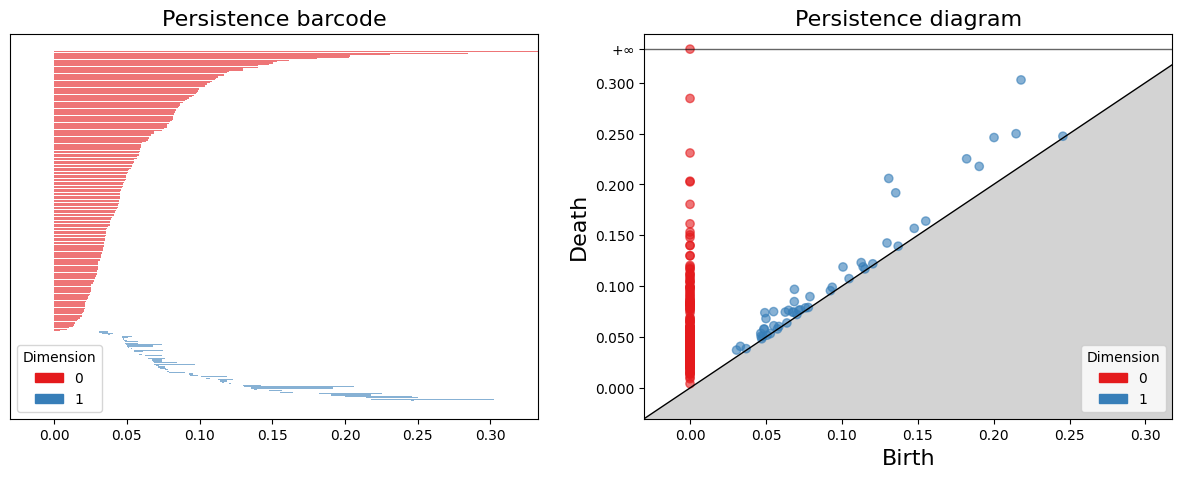

In [27]:
# Cálculo do complexo de Rips da amostra dos  dados
X = data_A_sample
st = gudhi.RipsComplex(points = X/2, max_edge_length = 0.5).create_simplex_tree(max_dimension=2)

# Cálculo e plot do barcode
barcode = st.persistence(homology_coeff_field = 2)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
gudhi.plot_persistence_barcode(barcode, axes = ax1)
gudhi.plot_persistence_diagram(barcode, axes = ax2)

In [47]:
N = 25 # número de séries temporais para cada pessoa

barcodes = []

for n in range(N):
    X = data_A[n] # X é um vetor do conjunto de dados
    RipsX = gudhi.RipsComplex(points = X/2, max_edge_length=1) # criamos um complexo de Rips para este vetor
    st = RipsX.create_simplex_tree(max_dimension=2) # Do complexo de Rips, cria-se uma árvore de símplices
    st.compute_persistence(homology_coeff_field = 2) # Dessa simplex tree, efetua-se o cálculo de persistência e dos barcodes
    barcodes.append(st.persistence_intervals_in_dimension(1)) # Por fim, adicionamos essa persistência a uma lista
    
# Em seguida, repetimos o processo para os outros dados

for n in range(N):
    X = data_B[n]
    RipsX = gudhi.RipsComplex(points = X/2, max_edge_length=1) 
    st = RipsX.create_simplex_tree(max_dimension=2) 
    st.compute_persistence(homology_coeff_field = 2) 
    barcodes.append(st.persistence_intervals_in_dimension(1))
    
for n in range(N):
    X = data_C[n] 
    RipsX = gudhi.RipsComplex(points = X/2, max_edge_length=1) 
    st = RipsX.create_simplex_tree(max_dimension=2) 
    st.compute_persistence(homology_coeff_field = 2) 
    barcodes.append(st.persistence_intervals_in_dimension(1))
    

In [29]:
#  O próximo passo é criar uma matriz para computar as distâncias entre as persistência

matriz_D = np.zeros((3*N, 3*N))

# Adicionamos as distâncias para cada elemento da matriz
for i in range(matriz_D.shape[0]):
    for j in range(matriz_D.shape[1]):
        matriz_D[i, j] = gudhi.bottleneck_distance(barcodes[i], barcodes[j])

In [36]:
"""Assim, temos a distância bottleneck entre dois pares de barcodes"""
matriz_D

array([[1.21563164e-308, 4.09334942e-002, 3.32937035e-002, ...,
        8.07265923e-002, 1.01536205e-001, 4.92456176e-002],
       [4.09334942e-002, 1.02369209e-308, 3.11414932e-002, ...,
        7.93534681e-002, 1.01536205e-001, 4.57216748e-002],
       [3.32937035e-002, 3.11414932e-002, 2.16815395e-308, ...,
        8.07265923e-002, 1.01536205e-001, 3.69691764e-002],
       ...,
       [8.07265923e-002, 7.93534681e-002, 8.07265923e-002, ...,
        1.36354965e-308, 4.89614126e-002, 7.86401812e-002],
       [1.01536205e-001, 1.01536205e-001, 1.01536205e-001, ...,
        4.89614126e-002, 1.20648654e-308, 8.16537565e-002],
       [4.92456176e-002, 4.57216748e-002, 3.69691764e-002, ...,
        7.86401812e-002, 8.16537565e-002, 1.29458503e-308]])

Uso do algoritmo *Multidimensional Scaling* (MDS) para representar estes dados no $\mathbb{R}^3$

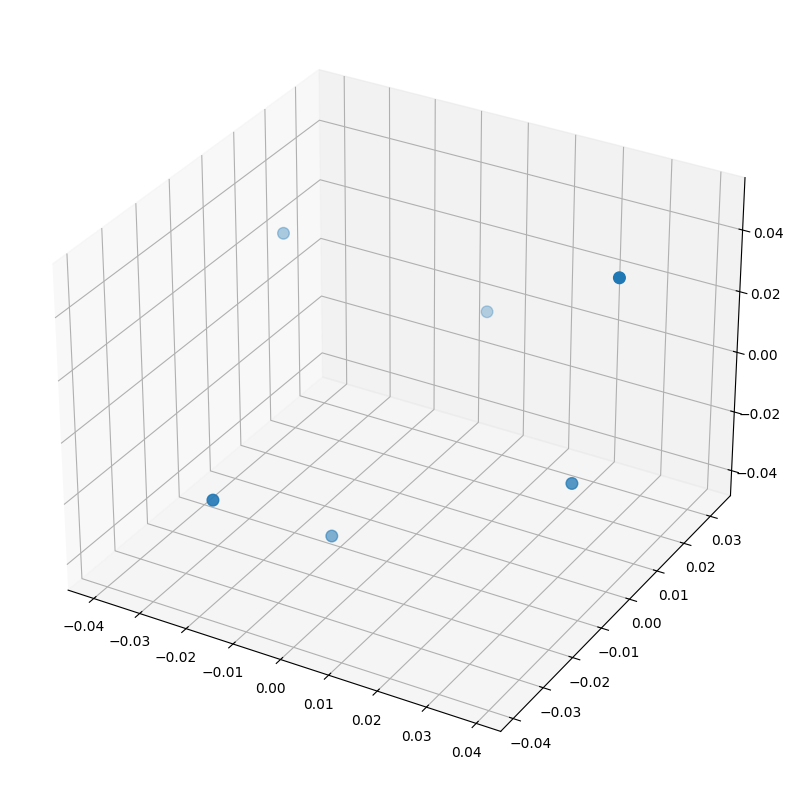

In [38]:
from sklearn import manifold

# Importamos o algoritmo do MDS da biblioteca scikit-learn
mds = manifold.MDS(n_components=3, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dist).embedding_
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:,0], pos[:, 1], pos[:,2], s=70)